In [1]:
!pip install kaggle
!pip install Keras
!pip install numpy
!pip install opencv-python
!pip install pandas
!pip install -U scikit-learn
!pip install seaborn
!pip install tensorflow
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle
!echo '{"username":"krishnakanugo","key":"e48c49a5fd670a1abfcec1a579ba40c9"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
%matplotlib inline

from keras.layers import Activation
from keras.layers import AveragePooling2D
from keras import backend
from keras.layers import BatchNormalization
from keras.layers import Concatenate
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D
import cv2
from keras.utils import data_utils
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.utils import load_img 
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import imagenet_utils
from tensorflow.keras.utils import img_to_array
from keras.layers import Input
from skimage import io
from keras.models import load_model
from keras.layers import MaxPooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import ZeroPadding2D

In [4]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

!unzip chest-xray-covid19-pneumonia.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Data/train/COVID19/COVID19(228).jpg  
  inflating: /content/Data/train/COVID19/COVID19(229).jpg  
  inflating: /content/Data/train/COVID19/COVID19(23).jpg  
  inflating: /content/Data/train/COVID19/COVID19(230).jpg  
  inflating: /content/Data/train/COVID19/COVID19(231).jpg  
  inflating: /content/Data/train/COVID19/COVID19(232).jpg  
  inflating: /content/Data/train/COVID19/COVID19(233).jpg  
  inflating: /content/Data/train/COVID19/COVID19(234).jpg  
  inflating: /content/Data/train/COVID19/COVID19(235).jpg  
  inflating: /content/Data/train/COVID19/COVID19(236).jpg  
  inflating: /content/Data/train/COVID19/COVID19(237).jpg  
  inflating: /content/Data/train/COVID19/COVID19(238).jpg  
  inflating: /content/Data/train/COVID19/COVID19(239).jpg  
  inflating: /content/Data/train/COVID19/COVID19(24).jpg  
  inflating: /content/Data/train/COVID19/COVID19(240).jpg  
  inflating: /content/Data/train/COVID19/COVID19(24

In [5]:
disease_types=['COVID19', 'PNEUMONIA', 'NORMAL']
home_dir = '/content'
data_dir = home_dir+'/Data'
train_dir = data_dir+'/train'
test_dir = data_dir+'/test'

In [6]:
train_set = []
for disease_id, disease_type in enumerate(disease_types):
    for file_name in os.listdir(os.path.join(train_dir, disease_type)):
        train_set.append(['{}/{}'.format(disease_type, file_name), disease_id, disease_type])
        
train = pd.DataFrame(train_set, columns=['File', 'Disease ID','Disease Type'])
train.tail()

,File,Disease ID,Disease Type
5139,NORMAL/NORMAL(1051).jpg,2,NORMAL
5140,NORMAL/NORMAL(949).jpg,2,NORMAL
5141,NORMAL/NORMAL(768).jpg,2,NORMAL
5142,NORMAL/NORMAL(214).jpg,2,NORMAL
5143,NORMAL/NORMAL(145).jpg,2,NORMAL


In [7]:
test_set = []
for disease_id, disease_type in enumerate(disease_types):
    for file_name in os.listdir(os.path.join(test_dir, disease_type)):
        test_set.append(['{}/{}'.format(disease_type, file_name), disease_id, disease_type])
        
test = pd.DataFrame(test_set, columns=['File', 'Disease ID','Disease Type'])
test.iloc[98:150,:]

,File,Disease ID,Disease Type
98,COVID19/COVID19(468).jpg,0,COVID19
99,COVID19/COVID19(477).jpg,0,COVID19
100,COVID19/COVID19(532).jpg,0,COVID19
101,COVID19/COVID19(550).jpg,0,COVID19
102,COVID19/COVID19(464).jpg,0,COVID19
103,COVID19/COVID19(480).jpg,0,COVID19
104,COVID19/COVID19(502).jpg,0,COVID19
105,COVID19/COVID19(514).jpg,0,COVID19
106,COVID19/COVID19(561).jpg,0,COVID19
107,COVID19/COVID19(478).jpg,0,COVID19


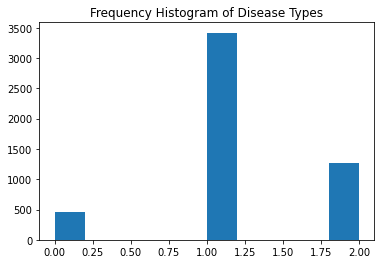

<Figure size 864x864 with 0 Axes>

In [8]:
plt.hist(train['Disease ID'])
plt.title('Frequency Histogram of Disease Types')
plt.figure(figsize=(12, 12))
plt.show()

In [9]:
def plot_sample_image(disease_type, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = train['File'][train['Disease Type'] == disease_type].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(train_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1

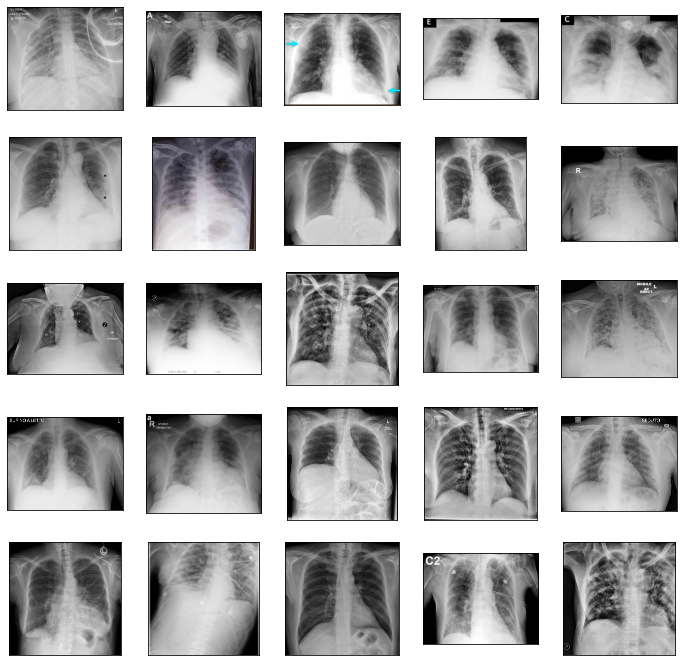

In [10]:
plot_sample_image('COVID19', 5, 5)

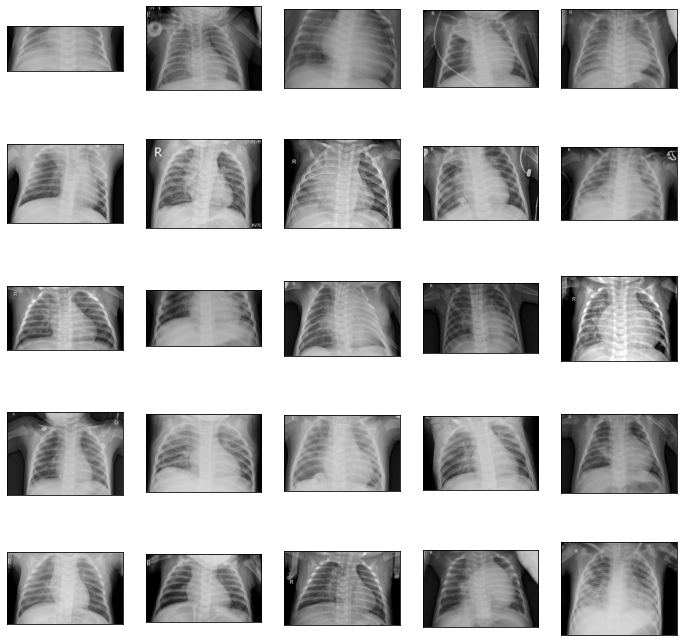

In [11]:
plot_sample_image('PNEUMONIA', 5, 5)




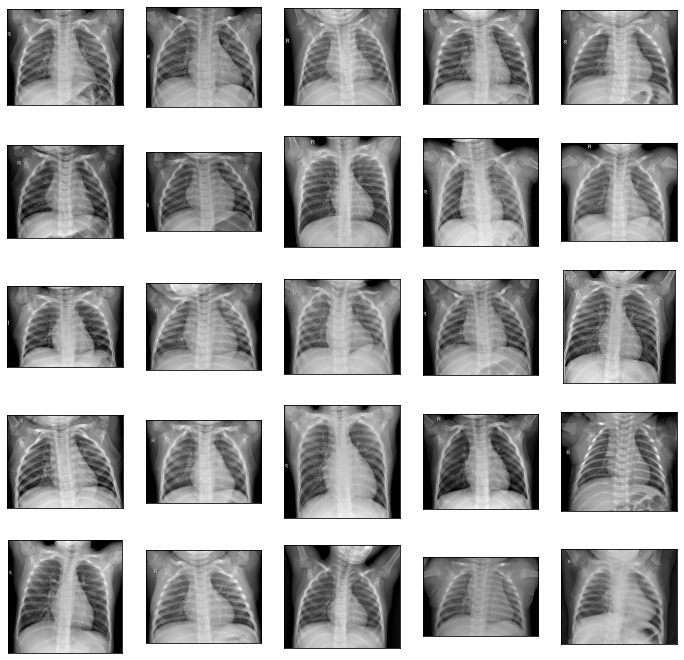

In [12]:
plot_sample_image('NORMAL', 5, 5)

DATA AGUMENTATION

In [13]:
IMAGE_SIZE = 64
def read_image(train_or_test_dir, filepath):
    return cv2.imread(os.path.join(train_or_test_dir, filepath)) # Loading a color image is the default flag

# Resize image to target size
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [14]:
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(train_dir, file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))

# Normalize the data
X_train /= 255.
print('\nTrain Shape: {}'.format(X_train.shape))

5144it [02:43, 31.54it/s]


Train Shape: (5144, 64, 64, 3)


In [15]:
# Categorical Data
Y_train = train['Disease ID'].values
Y_train = to_categorical(Y_train, num_classes=3)

In [16]:
BATCH_SIZE = 64

X_test = np.zeros((test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in tqdm(enumerate(test['File'].values)):
    image = read_image(test_dir, file)
    if image is not None:
        X_test[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))

# Normalize the data
X_test /= 255.
print('\nTest Shape: {}'.format(X_test.shape))

1288it [00:38, 33.15it/s]


Test Shape: (1288, 64, 64, 3)


In [17]:

# Categorical Data
Y_test = test['Disease ID'].values
Y_test = to_categorical(Y_test, num_classes=3)

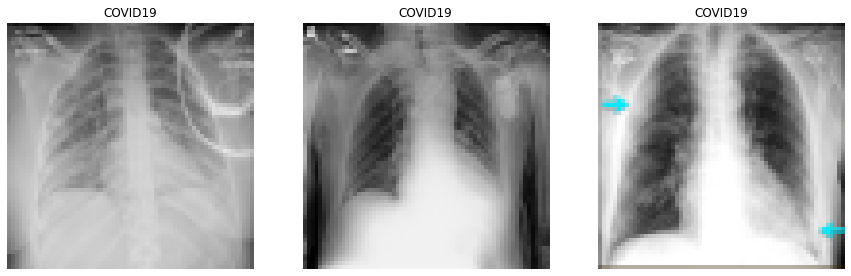

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(disease_types[np.argmax(Y_train[i])])

In [19]:
EPOCHS = 50

In [20]:
def ConvolutionBlock(x, growth_rate, name):
    """A building block for a dense block.
    Args:
      x: input tensor.
      growth_rate: float, growth rate at dense layers.
      name: string, block label.
    Returns:
      Output tensor for the block.
    """
    bn_axis = 3 if backend.image_data_format() == "channels_last" else 1
    
    # Conv 1x1
    x1 = BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + "_0_bn")(x)
    x1 = Activation("relu", name=name + "_0_relu")(x1)
    x1 = Conv2D(4 * growth_rate, 1, use_bias=False, name=name + "_1_conv")(x1)
    
    # Conv 3x3
    x1 = BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + "_1_bn")(x1)
    x1 = Activation("relu", name=name + "_1_relu")(x1)
    x1 = Conv2D(growth_rate, 3, padding="same", use_bias=False, name=name + "_2_conv")(x1)

    # Merge the results
    x  = Concatenate(axis=bn_axis, name=name + "_concat")([x, x1])
    
    return x

In [21]:
def DenseBlock(x, blocks, name):
    """A dense block.
    Args:
      x: input tensor.
      blocks: integer, the number of building blocks.
      name: string, block label.
    Returns:
      Output tensor for the block.
    """
    for i in range(blocks):
        x = ConvolutionBlock(x, 32, name=name + "_block" + str(i + 1))
    
    return x

In [22]:
def TransitionBlock(x, reduction, name):
    """A transition block.
    Args:
      x: input tensor.
      reduction: float, compression rate at transition layers.
      name: string, block label.
    Returns:
      output tensor for the block.
    """
    bn_axis = 3 if backend.image_data_format() == "channels_last" else 1
    
    x = BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + "_bn")(x)
    x = Activation("relu", name=name + "_relu")(x)
    x = Conv2D(int(backend.int_shape(x)[bn_axis] * reduction), 1, use_bias=False, name=name + "_conv")(x)
    x = AveragePooling2D(2, strides=2, name=name + "_pool")(x)

    return x

In [23]:
def DenseNet121(input_shape=(64, 64, 3), weights="imagenet"):
    """Instantiates the DenseNet121 architecture.
    Reference:
    - [Densely Connected Convolutional Networks](
        https://arxiv.org/abs/1608.06993) (CVPR 2017)
    This function returns a Keras image classification model.
    Args:      
      input_shape: optional shape tuple, the input shape
        has to be `(224, 224, 3)` (with `'channels_last'` data format)
        or `(3, 224, 224)` (with `'channels_first'` data format).
        It should have exactly 3 inputs channels,
        and width and height should be no smaller than 32.
        E.g. `(200, 200, 3)` would be one valid value.
      weights: one of `None` (random initialization),
        'imagenet' (pre-training on ImageNet),
        or the path to the weights file to be loaded.
    Returns:
      A `keras.Model` instance.
    """
    bn_axis = 3 if backend.image_data_format() == "channels_last" else 1

    input_shape = imagenet_utils.obtain_input_shape(
        input_shape,
        default_size=64,
        min_size=32,
        data_format=backend.image_data_format(),
        require_flatten=False,
        weights=weights,
    )

    img_input = Input(shape=input_shape)
    
    # Conv 7x7 | Stride 2
    x = ZeroPadding2D(padding=((3, 3), (3, 3)))(img_input)
    x = Conv2D(64, 7, strides=2, use_bias=False, name="conv1/conv")(x)
    x = BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name="conv1/bn")(x)
    x = Activation("relu", name="conv1/relu")(x)
    
    # MaxPool 3x3 | Stride 2
    x = ZeroPadding2D(padding=((1, 1), (1, 1)))(x)
    x = MaxPooling2D(3, strides=2, name="pool1")(x)
    
    # 4 Dense Blocks + 3 Transition Blocks
    x = DenseBlock(x, 6, name="conv2")
    x = TransitionBlock(x, 0.5, name="trans1")    
    x = DenseBlock(x, 12, name="conv3")
    x = TransitionBlock(x, 0.5, name="trans2")
    x = DenseBlock(x, 24, name="conv4")
    x = TransitionBlock(x, 0.5, name="trans3")
    x = DenseBlock(x, 16, name="conv5")

    x = BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name="bn")(x)
    x = Activation("relu", name="relu")(x)    
 
    # Final Model
    model = Model(img_input, x, name="DenseNet121")

    # Load weights Online
    BASE_WEIGHTS_PATH = (
        "https://storage.googleapis.com/tensorflow/keras-applications/densenet/"
    )
    DENSENET121_WEIGHT_PATH_NO_TOP = (
        BASE_WEIGHTS_PATH
        + "densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5"
    )

    if weights == "imagenet":
        weights_path = data_utils.get_file(
            "densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5",
            DENSENET121_WEIGHT_PATH_NO_TOP,
            cache_subdir="models",
            file_hash="30ee3e1110167f948a6b9946edeeb738",
        )
        model.load_weights(weights_path)
    elif weights is not None:
        model.load_weights(weights)
    
    return model

In [24]:
def build_model():
    input = Input(shape=(64, 64, 3), name='input')
    
    x = DenseNet121()(input) 

    x = GlobalAveragePooling2D(name="avg_pool")(x)
    x = BatchNormalization(name="bn_1")(x)
    x = Dropout(0.5, name="dropout_1")(x)
    x = Dense(1000, activation='relu')(x)
    x = BatchNormalization(name="bn_2")(x)
    x = Dropout(0.5, name="dropout_2")(x)

    # output
    output = Dense(3, activation='softmax', name='predictions')(x)
 
    # model
    model = Model(input, output, name="model")
    
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()


    return model

In [117]:
model = build_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 64, 64, 3)]       0         
                                                                 
 DenseNet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 avg_pool (GlobalAveragePool  (None, 1024)             0         
 ing2D)                                                          
                                                                 
 bn_1 (BatchNormalization)   (None, 1024)              4096      
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 1000)              1025000   
                                                             

In [1]:
datagen = ImageDataGenerator(rotation_range=360, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True)

datagen.fit(X_train)

NameError: name 'ImageDataGenerator' is not defined

In [123]:
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('best_model.h5', verbose=1, save_best_only=True)


history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
    epochs=5,
    verbose=2,
    callbacks=[annealer, checkpoint],
    validation_data=(X_test, Y_test),
    )


Epoch 1/5

Epoch 1: val_loss improved from inf to 0.54934, saving model to best_model.h5
80/80 - 335s - loss: 0.4973 - accuracy: 0.8406 - val_loss: 0.5493 - val_accuracy: 0.8975 - lr: 0.0020 - 335s/epoch - 4s/step
Epoch 2/5

Epoch 2: val_loss did not improve from 0.54934
80/80 - 328s - loss: 0.4058 - accuracy: 0.8781 - val_loss: 0.6617 - val_accuracy: 0.8766 - lr: 0.0020 - 328s/epoch - 4s/step
Epoch 3/5

Epoch 3: val_loss improved from 0.54934 to 0.28510, saving model to best_model.h5
80/80 - 328s - loss: 0.3449 - accuracy: 0.8990 - val_loss: 0.2851 - val_accuracy: 0.8960 - lr: 0.0020 - 328s/epoch - 4s/step
Epoch 4/5

Epoch 4: val_loss improved from 0.28510 to 0.23036, saving model to best_model.h5
80/80 - 331s - loss: 0.3304 - accuracy: 0.9041 - val_loss: 0.2304 - val_accuracy: 0.9317 - lr: 0.0020 - 331s/epoch - 4s/step
Epoch 5/5

Epoch 5: val_loss improved from 0.23036 to 0.21658, saving model to best_model.h5
80/80 - 327s - loss: 0.2758 - accuracy: 0.9087 - val_loss: 0.2166 - val_ac

In [124]:
model = load_model('/content/best_model.h5')
final_loss, final_accuracy = model.evaluate(X_test, Y_test)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

41/41 [==============================] - 17s 371ms/step - loss: 0.2166 - accuracy: 0.9200
Final Loss: 0.21658426523208618, Final Accuracy: 0.9200310707092285


41/41 [==============================] - 17s 366ms/step


Text(0.5, 145.31999999999996, 'Predicted')

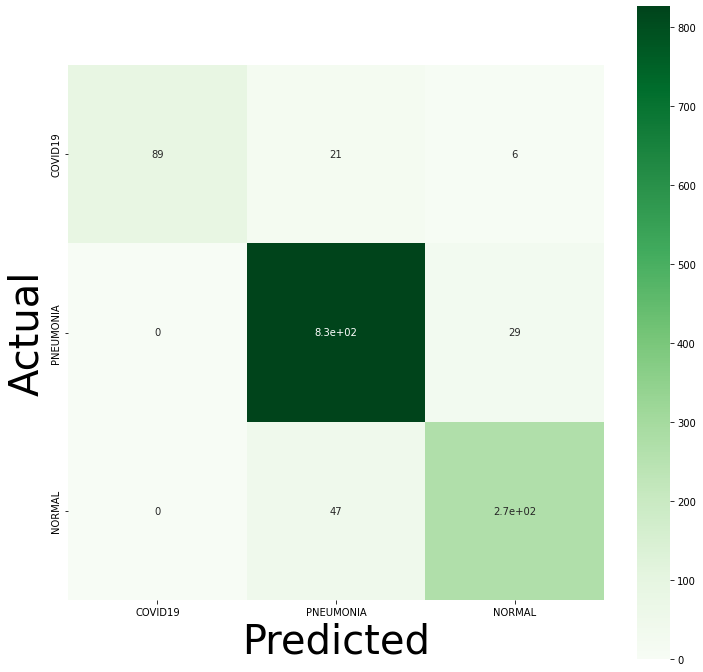

In [125]:
Y_pred = model.predict(X_test)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [2]:

disease_class=['Covid19', 'Pneumonia', 'Normal']


img_file_name = ['A:\\Downloads\\archive\\Data\\test\\COVID19\\COVID19']



show_img = []
custom = []
ind = []

for i in range(3):
  img = load_img(img_file_name[0], grayscale=False, target_size=(64, 64))
  show_img.insert(0, load_img(img_file_name[0], grayscale=False, target_size=(200, 200)))
  x = img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  x /= 255
  custom.insert(0, model.predict(x))
  a = custom[0][0]
  ind.insert(i, np.argmax(a))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.set_axis_off()
ax.imshow(show_img[i])
ax.set_title('Prediction: {}\n{}'.format(disease_class[ind[0]], custom[0][0]))

NameError: name 'load_img' is not defined